# Preview - Dataset - Template

> Boston Hous

- Goal of this notebook is to paste a template version of the workflow from the ADMIN_Comparing_Datasets notebook.
 
**The code will:**
- Create 4 preprocessing pipelines (one with scaling and one without)
    - `preprocessor`
        - Clone: `preprocessor_cln`
    - `preprocessor_scale`
        - Clone: `preprocessor_scale_cln`    
    
- Create 4 Versions of the X/y data.
    - **All Data/Rows:**
        - Starting Vars:
            - df,X,y, X_train, X_test,y_train,y_test
        - **Unscaled**
            - Without a  constant:
                - X_train_df, X_test_df, y_train,y_test
            - With a constant:
                - X_train_df_cnst, X_test_df_cnst, y_train (same), y_test (same)
        - **Scaled:**
            - Without a  constant:
                - X_train_df_scaled, X_test_df_scaled, y_train (same), y_test (same)
            - With a constant:
                - X_train_df_scaled_cnst, X_test_df_scaled_cnst, y_train (same), y_test (same)

    - **Cleaned/Outliers Removed**
        - Starting Vars:
            - df_clean,X_cln,y_cln, X_train_cln, X_test_cln,y_train_cln,y_test_cln
        - **Unscaled**
            - Without a  constant:
                - X_train_df_cln, X_test_df_cln, y_train,y_test
            - With a constant:
                - X_train_df_cln_cnst, X_test_df_cln_cnst, y_train_cln (same), y_test_cln (same)
        - **Scaled:**
            - Without a  constant:
                - X_train_df_cln_scaled, X_test_df_cln_scaled, y_train_cln (same), y_test_cln (same)
            - With a constant:
                - X_train_df_scaled_cln_cnst, X_test_df_cln_scaled_cnst, y_train_cln (same), y_test_cln (same)

# Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
## Customization Options
# pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option("display.max_columns",100)
plt.style.use(['fivethirtyeight','seaborn-talk'])
mpl.rcParams['figure.facecolor']='white'

## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics

from sklearn.base import clone

## fixing random for lesson generation
np.random.seed(321)

##import statsmodels correctly
import statsmodels.api as sm
from scipy import stats

## Customized Options
# pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
# plt.style.use('seaborn-talk')

In [2]:
## Adding folder above to path
import os, sys
sys.path.append(os.path.abspath('../'))

## Load stack_functions with autoreload turned on
%load_ext autoreload
%autoreload 2
from CODE import stack_functions as sf

def show_code(function):
    import inspect 
    from IPython.display import display,Markdown, display_markdown
    code = inspect.getsource(function)
    md_txt = f"```python\n{code}\n```"
    return display(Markdown(md_txt))
    

## Preliminary Checks and Dtype Conversion

- Change:
    - `FILE`: url or filepath to load
    - `DROP_COLS`: list of columns to drop from df
    - `CONVERT_TO_STR_COLS`: numeric cols to convert to str
    - `CONVERT_TO_NUM_COLS`: str cols to convert to numeric (uses pd.to_numeric)

In [3]:
## Load in data
FILE = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQl_9a0tUmjuIz8oZa__K6JlAp89nnQMLMQmqYATlI9QjFPUSb-BxYb_ffw4GWpOqVgQHrTZXU34CgH/pub?output=csv"
df = pd.read_csv(FILE)

In [4]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


CRIM    NOX     RM   AGE  PTRATIO  LSTAT  PRICE
0  0.00632  0.538  6.575  65.2     15.3   4.98   24.0
1  0.02731  0.469  6.421  78.9     17.8   9.14   21.6
2  0.02729  0.469  7.185  61.1     17.8   4.03   34.7
3  0.03237  0.458  6.998  45.8     18.7   2.94   33.4
4  0.06905  0.458  7.147  54.2     18.7   5.33   36.2

In [6]:
## Drop unwanted columns
DROP_COLS = []#'id','date']
df = df.drop(columns=DROP_COLS)

In [7]:
## Convert all categories to strings
CONVERT_TO_STR_COLS = []#'zipcode']
df[CONVERT_TO_STR_COLS] = df[CONVERT_TO_STR_COLS].astype(str)

CONVERT_TO_NUM_COLS = []
for col in CONVERT_TO_NUM_COLS:
    df[col] = pd.to_numeric(df[col])

In [8]:
## final info before X/y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


## Full Dataset Preprocessing

In [9]:
## Make x and y variables
target = "PRICE"#'price'
drop_cols_model = []

y = df[target].copy()
X = df.drop(columns=[target,*drop_cols_model]).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

CRIM    NOX     RM    AGE  PTRATIO  LSTAT
339  0.05497  0.515  5.985   45.4     20.2   9.74
214  0.28955  0.489  5.412    9.8     18.6  29.55
142  3.32105  0.871  5.403  100.0     14.7  26.82
136  0.32264  0.624  5.942   93.5     21.2  16.90
383  7.99248  0.700  5.520  100.0     20.2  24.56

### Unscaled

In [10]:
## cat selector
cat_sel = make_column_selector(dtype_include='object')
cat_cols = cat_sel(X)

# num selectorr
num_sel = make_column_selector(dtype_include='number')
num_cols = num_sel(X)

## make pipelines & column transformer - raw numeric
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

num_pipe_raw = make_pipeline(SimpleImputer(strategy='mean'))
preprocessor = make_column_transformer((num_pipe_raw, num_sel),
                                       (cat_pipe,cat_sel), verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x142745c10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x142745d00>)],
                  verbose_feature_names_out=False)

In [11]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df = pd.DataFrame( preprocessor.fit_transform(X_train), 
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)

## Prepare X_test_df
X_test_df = pd.DataFrame( preprocessor.transform(X_test),
                         columns=preprocessor.get_feature_names_out(), 
                         index=X_test.index)


## Prepare X vars with constant
X_train_df_cnst = sm.add_constant(X_train_df, prepend=False, has_constant='add')
X_test_df_cnst = sm.add_constant(X_test_df, prepend=False, has_constant='add')

In [12]:
X_train_df.describe()

CRIM         NOX          RM         AGE     PTRATIO       LSTAT
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000
mean     3.572511    0.553751    6.272501   68.622427   18.429024   12.764301
std      8.306145    0.114189    0.681767   28.454526    2.166362    7.253498
min      0.006320    0.385000    3.863000    6.000000   12.600000    1.730000
25%      0.079550    0.451000    5.888500   44.050000   16.950000    6.910000
50%      0.251990    0.538000    6.208000   78.700000   19.000000   11.410000
75%      3.444865    0.624000    6.605000   94.400000   20.200000   17.025000
max     73.534100    0.871000    8.725000  100.000000   22.000000   37.970000

> The cell below should be updated for each dataset- only separating high cardinality OHE features (e.g. zipcode)

In [13]:
## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df.drop(columns=[*ohe_cols]).columns.tolist()

### Scaled

In [14]:
## make pipelines & column transformer - scaled
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe_scale = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
preprocessor_scale = make_column_transformer((num_pipe_scale, num_sel),
                                       (cat_pipe,cat_sel), verbose_feature_names_out=False)
preprocessor_scale

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x142745c10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x142745d00>)],
                  verbose_feature_names_out=False)

In [15]:
# ### PREP ALL SCALED X VARS


# Prepare X_train_scaled_df & X_test_scaled_df
X_train_scaled_df = pd.DataFrame( preprocessor_scale.fit_transform(X_train), 
                          columns=preprocessor_scale.get_feature_names_out(),
                         index=X_train.index)


X_test_scaled_df = pd.DataFrame( preprocessor_scale.transform(X_test),
                         columns=preprocessor_scale.get_feature_names_out(), 
                         index=X_test.index)


## Save vers with constant
X_train_scaled_df_cnst = sm.add_constant(X_train_scaled_df, prepend=False, has_constant='add')
X_test_scaled_df_cnst = sm.add_constant(X_test_scaled_df, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df.drop(columns=[*ohe_cols]).columns.tolist()


X_test_scaled_df.head()

CRIM       NOX        RM       AGE   PTRATIO     LSTAT
379  1.723192  1.028150 -0.072703  1.104185  0.818569  1.244588
59  -0.418222 -0.883487 -0.507443 -0.753861  0.587462 -0.489279
398  4.192711  1.221067 -1.203615  1.104185  0.818569  2.460780
389  0.552035  1.282450 -1.296144  1.065475  0.818569  1.116205
419  0.993323  1.440292  0.809995  0.277214  0.818569  1.377113

In [16]:
X_train_scaled_df.describe()

CRIM           NOX            RM         AGE       PTRATIO  \
count  3.790000e+02  3.790000e+02  3.790000e+02  379.000000  3.790000e+02   
mean   3.163696e-17 -5.296262e-16 -4.663523e-16    0.000000  1.128385e-15   
std    1.001322e+00  1.001322e+00  1.001322e+00    1.001322  1.001322e+00   
min   -4.299112e-01 -1.479778e+00 -3.538874e+00   -2.203699 -2.694254e+00   
25%   -4.210831e-01 -9.010252e-01 -5.639890e-01   -0.864710 -6.836249e-01   
50%   -4.002952e-01 -1.381241e-01 -9.473415e-02    0.354632  2.639130e-01   
75%   -1.538791e-02  6.160080e-01  4.883463e-01    0.907119  8.185693e-01   
max    8.434005e+00  2.781945e+00  3.602025e+00    1.104185  1.650554e+00   

              LSTAT  
count  3.790000e+02  
mean   9.373915e-18  
std    1.001322e+00  
min   -1.523249e+00  
25%   -8.081672e-01  
50%   -1.869568e-01  
75%    5.881757e-01  
max    3.479565e+00

## Cleaned Dataset Preprocessing

### Remove Outliers

In [17]:
show_code(sf.remove_outliers)

```python
def remove_outliers(df_,method='iqr', subset=None, verbose=2):
    """Returns a copy of the input df with outleirs removed from all
    columns using the selected method (either 'iqr' or 'z'/'zscore')
    
    Arguments:
        df_ (Frame): Dataframe to copy and remove outleirs from
        method (str): Method of outlier removal. Options are 'iqr' or 'z' (default is 'iqr')
        subset (list or None): List of column names to remove outliers from. If None, uses all numeric columns.
        verbose (bool, int): If verbose==1, print only overall summary. If verbose==2, print detailed summary"""
    import pandas as pd
    ## Make a cope of input dataframe  
    df = df_.copy()
    
    ## Set verbose_func for calls to outleir funcs
    if verbose==2:
        verbose_func = True
    else:
        verbose_func=False
        
    ## Set outlier removal function and name
    if method.lower()=='iqr':
        find_outlier_func = find_outliers_IQR
        method_name = "IQR rule"
    elif 'z' in method.lower():
        find_outlier_func = find_outliers_Z
        method_name = 'Z_score rule'
    else:
        raise Exception('[!] Method must be either "iqr" or "z".')
        
    ## Set list of cols to remove outliers from
    if subset is None:
        col_list = df.select_dtypes('number').columns
    elif isinstance(subset,str):
        col_list = [subset]
    elif isinstance(susbet, list):
        col_list = subset
    else:
        raise Exception("[!] subset must be None, a single string, or a list of strings.")

    

    
    ## Empty dict for both types of outliers
    outliers = {}

    ## Use both functions to see the comparison for # of outliers
    for col in col_list:
        idx_outliers = find_outlier_func(df[col],verbose=verbose_func)
        outliers[col] = idx_outliers

    
    ## Getting final df of all outliers to get 1 final T/F index
    outliers_combined = pd.DataFrame(outliers).any(axis=1)
    
    if verbose:
        n = len(outliers_combined)
        print(f"\n[i] Overall, {outliers_combined.sum():,} rows out of {n:,}({outliers_combined.sum()/n*100:.2f}%) were removed as outliers using {method_name}.")
    
    
    # remove_outliers 
    df_clean = df[~outliers_combined].copy()
    return df_clean

```

In [18]:
df_clean_iqr = sf.remove_outliers(df,verbose=2)
df_clean_iqr

- 66 outliers found in CRIM out of 506 rows (13.04%) using IQR.
- 0 outliers found in NOX out of 506 rows (0.00%) using IQR.
- 30 outliers found in RM out of 506 rows (5.93%) using IQR.
- 0 outliers found in AGE out of 506 rows (0.00%) using IQR.
- 15 outliers found in PTRATIO out of 506 rows (2.96%) using IQR.
- 7 outliers found in LSTAT out of 506 rows (1.38%) using IQR.
- 40 outliers found in PRICE out of 506 rows (7.91%) using IQR.

[i] Overall, 116 rows out of 506(22.92%) were removed as outliers using IQR rule.


CRIM    NOX     RM   AGE  PTRATIO  LSTAT  PRICE
0    0.00632  0.538  6.575  65.2     15.3   4.98   24.0
1    0.02731  0.469  6.421  78.9     17.8   9.14   21.6
2    0.02729  0.469  7.185  61.1     17.8   4.03   34.7
3    0.03237  0.458  6.998  45.8     18.7   2.94   33.4
4    0.06905  0.458  7.147  54.2     18.7   5.33   36.2
..       ...    ...    ...   ...      ...    ...    ...
501  0.06263  0.573  6.593  69.1     21.0   9.67   22.4
502  0.04527  0.573  6.120  76.7     21.0   9.08   20.6
503  0.06076  0.573  6.976  91.0     21.0   5.64   23.9
504  0.10959  0.573  6.794  89.3     21.0   6.48   22.0
505  0.04741  0.573  6.030  80.8     21.0   7.88   11.9

[390 rows x 7 columns]

In [19]:
df_clean_z = sf.remove_outliers(df,method='z')
df_clean_z

- 8 outliers found in CRIM out of 506 rows (1.58%) using Z-scores.
- 0 outliers found in NOX out of 506 rows (0.00%) using Z-scores.
- 8 outliers found in RM out of 506 rows (1.58%) using Z-scores.
- 0 outliers found in AGE out of 506 rows (0.00%) using Z-scores.
- 0 outliers found in PTRATIO out of 506 rows (0.00%) using Z-scores.
- 5 outliers found in LSTAT out of 506 rows (0.99%) using Z-scores.
- 0 outliers found in PRICE out of 506 rows (0.00%) using Z-scores.

[i] Overall, 19 rows out of 506(3.75%) were removed as outliers using Z_score rule.


CRIM    NOX     RM   AGE  PTRATIO  LSTAT  PRICE
0    0.00632  0.538  6.575  65.2     15.3   4.98   24.0
1    0.02731  0.469  6.421  78.9     17.8   9.14   21.6
2    0.02729  0.469  7.185  61.1     17.8   4.03   34.7
3    0.03237  0.458  6.998  45.8     18.7   2.94   33.4
4    0.06905  0.458  7.147  54.2     18.7   5.33   36.2
..       ...    ...    ...   ...      ...    ...    ...
501  0.06263  0.573  6.593  69.1     21.0   9.67   22.4
502  0.04527  0.573  6.120  76.7     21.0   9.08   20.6
503  0.06076  0.573  6.976  91.0     21.0   5.64   23.9
504  0.10959  0.573  6.794  89.3     21.0   6.48   22.0
505  0.04741  0.573  6.030  80.8     21.0   7.88   11.9

[487 rows x 7 columns]

In [20]:
## Make x and y variables
# target = 'price'
# drop_cols_model = []

y_cln = df_clean_z[target].copy()
X_cln = df_clean_z.drop(columns=[target,*drop_cols_model]).copy()

X_train_cln, X_test_cln, y_train_cln, y_test_cln = train_test_split(X_cln,y_cln, random_state=321)
X_train_cln.head()

CRIM    NOX     RM    AGE  PTRATIO  LSTAT
143  4.09740  0.871  5.468  100.0     14.7  26.42
228  0.29819  0.504  7.686   17.0     17.4   3.92
44   0.12269  0.448  6.069   40.0     17.9   9.55
188  0.12579  0.437  6.556   29.1     15.2   4.56
147  2.36862  0.871  4.926   95.7     14.7  29.53

### Unscaled

In [21]:
## Cloning the Previous 2 Preprocessors
preprocessor_cln = clone(preprocessor)
preprocessor_cln_scale = clone(preprocessor_scale)

In [22]:
### PREP ALL X VARS
## Prepare X_train_df
X_train_df_cln = pd.DataFrame( preprocessor_cln.fit_transform(X_train_cln), 
                          columns=preprocessor_cln.get_feature_names_out(),
                         index=X_train_cln.index)

## Prepare X_test_df
X_test_df_cln = pd.DataFrame( preprocessor_cln.transform(X_test_cln),
                         columns=preprocessor_cln.get_feature_names_out(), 
                         index=X_test_cln.index)


## Prepare X vars with constant
X_train_df_cln_cnst = sm.add_constant(X_train_df_cln, prepend=False, has_constant='add')
X_test_df_cln_cnst = sm.add_constant(X_test_df_cln, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_df_cln.columns if c.startswith('zipcode')]
nonohe_cols = X_train_df_cln.drop(columns=[*ohe_cols]).columns.tolist()

X_test_df.head()

CRIM    NOX     RM    AGE  PTRATIO  LSTAT
379  17.86670  0.671  6.223  100.0     20.2  21.78
59    0.10328  0.453  5.927   47.2     19.7   9.22
398  38.35180  0.693  5.453  100.0     20.2  30.59
389   8.15174  0.700  5.390   98.9     20.2  20.85
419  11.81230  0.718  6.824   76.5     20.2  22.74

In [23]:
X_train_df_cln.describe()

CRIM         NOX          RM         AGE     PTRATIO       LSTAT
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000
mean     2.610050    0.551262    6.288756   67.883288   18.392055   12.442274
std      4.944561    0.116354    0.634508   28.273689    2.200978    6.639697
min      0.006320    0.389000    4.368000    6.000000   12.600000    1.730000
25%      0.081990    0.448000    5.895000   42.200000   16.900000    7.340000
50%      0.261690    0.532000    6.209000   76.700000   19.000000   11.280000
75%      2.379340    0.614000    6.556000   93.300000   20.200000   16.940000
max     28.655800    0.871000    8.337000  100.000000   22.000000   30.810000

### Scaled

In [24]:
# ### PREP ALL SCALED X VARS


# Prepare X_train_scaled_df & X_test_scaled_df
X_train_scaled_df_cln = pd.DataFrame( preprocessor_cln_scale.fit_transform(X_train_cln), 
                          columns=preprocessor_cln_scale.get_feature_names_out(),
                         index=X_train_cln.index)


X_test_scaled_df_cln = pd.DataFrame( preprocessor_cln_scale.transform(X_test_cln),
                         columns=preprocessor_cln_scale.get_feature_names_out(), 
                         index=X_test_cln.index)


## Save vers with constant
X_train_scaled_df_cln_cnst = sm.add_constant(X_train_scaled_df_cln, prepend=False, has_constant='add')
X_test_scaled_df_cln_cnst = sm.add_constant(X_test_scaled_df_cln, prepend=False, has_constant='add')


## Save list of zipcode columns and other columns
ohe_cols = [c for c in X_train_scaled_df_cln.columns if c.startswith('zipcode')]
nonohe_cols = X_train_scaled_df_cln.drop(columns=[*ohe_cols]).columns.tolist()


X_train_scaled_df_cln.head()

CRIM       NOX        RM       AGE   PTRATIO     LSTAT
143  0.301218  2.751738 -1.295307  1.137481 -1.679764  2.108065
228 -0.468198 -0.406752  2.205112 -1.802140 -0.451352 -1.285295
44  -0.503740 -0.888702 -0.346816 -0.987546 -0.223869 -0.436201
188 -0.503112 -0.983370  0.421761 -1.373592 -1.452280 -1.188773
147 -0.048894  2.751738 -2.150684  0.985188 -1.679764  2.577103

In [25]:
X_train_scaled_df_cln.describe()

CRIM           NOX            RM           AGE       PTRATIO  \
count  3.650000e+02  3.650000e+02  3.650000e+02  3.650000e+02  3.650000e+02   
mean  -9.246789e-17  1.946692e-16  6.491003e-16 -7.543433e-17  1.912625e-15   
std    1.001373e+00  1.001373e+00  1.001373e+00  1.001373e+00  1.001373e+00   
min   -5.273075e-01 -1.396470e+00 -3.031313e+00 -2.191728e+00 -2.635194e+00   
25%   -5.119828e-01 -8.887016e-01 -6.214209e-01 -9.096281e-01 -6.788359e-01   
50%   -4.755900e-01 -1.657774e-01 -1.258702e-01  3.122626e-01  2.765951e-01   
75%   -4.672338e-02  5.399343e-01  4.217608e-01  9.001868e-01  8.225556e-01   
max    5.274787e+00  2.751738e+00  3.232512e+00  1.137481e+00  1.641496e+00   

              LSTAT  
count  3.650000e+02  
mean   9.733462e-18  
std    1.001373e+00  
min   -1.615583e+00  
25%   -7.695046e-01  
50%   -1.752895e-01  
75%    6.783291e-01  
max    2.770147e+00

## Modeling - Full Dataset

### Raw Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1264.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):                   2.23e-244
Time:                        14:52:22   Log-Likelihood:                         -1167.2
No. Observations:                 379   AIC:                                      2346.
Df Residuals:                     373   BIC:                                      2370.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0731      0.038     -1.923      0.055      -0.148       0.002
NOX            0.3157      3.599      0.088      0.930      -6.761       7.393
RM             6.1874      0.311     19.926      0.000       5.577       6.798
AGE            0.0047      0.015      0.323      0.747      -0.024       0.033
PTRATIO       -0.5926      0.111     -5.352      0.000      -0.810      -0.375
LSTAT         -0.4415      0.061     -7.270      0.000      -0.561      -0.322
==============================================================================
Omnibus:                      166.508   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              905.326
Skew:                           1.810   Prob(JB):                    2.58e-197
Kurtosis:                       9.651   Cond. No.                     1.03e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

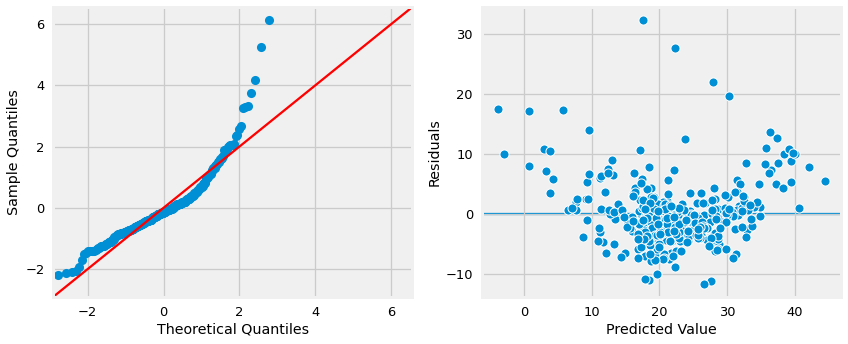

In [26]:
## instantiate an OLS model WITH the training data.
model_raw = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result_raw = model_raw.fit()
sf.evaluate_ols(result_raw,X_train_df, y_train)

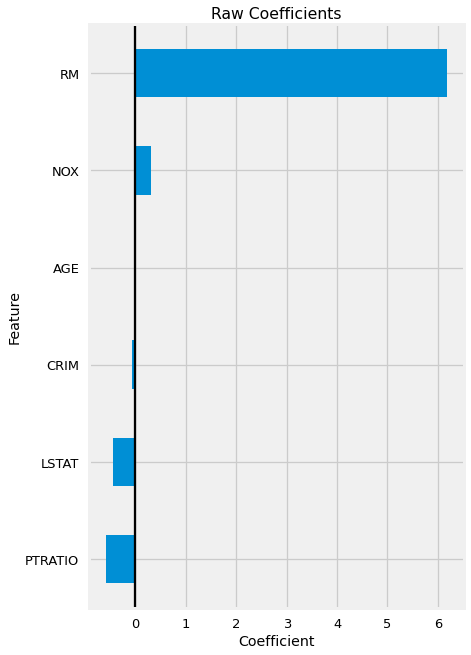

In [27]:
fig_raw = sf.plot_coeffs(result_raw, ohe_cols, include_const=True,title="Raw Coefficients")

In [28]:
fig_raw_zips =sf.plot_coeffs(result_raw, nonohe_cols, figsize=(6,12),
                           include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Raw Numeric - with Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     128.7
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.46e-87
Time:                        14:52:22   Log-Likelihood:                -1162.5
No. Observations:                 379   AIC:                             2339.
Df Residuals:                     372   BIC:                             2366.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0490      0.038     -1.274      0.204      -0.125       0.027
NOX           -3.5628      3.777     -0.943      0.346     -10.990       3.865
RM             4.8134      0.543      8.862      0.000       3.745       5.882
AGE            0.0162      0.015      1.092      0.275      -0.013       0.045
PTRATIO       -0.8576      0.139     -6.149      0.000      -1.132      -0.583
LSTAT         -0.5100      0.064     -7.959      0.000      -0.636      -0.384
const         15.6897      5.116      3.067      0.002       5.629      25.750
==============================================================================
Omnibus:                      164.041   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.101
Skew:                           1.827   Prob(JB):                    3.66e-173
Kurtosis:                       9.077   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

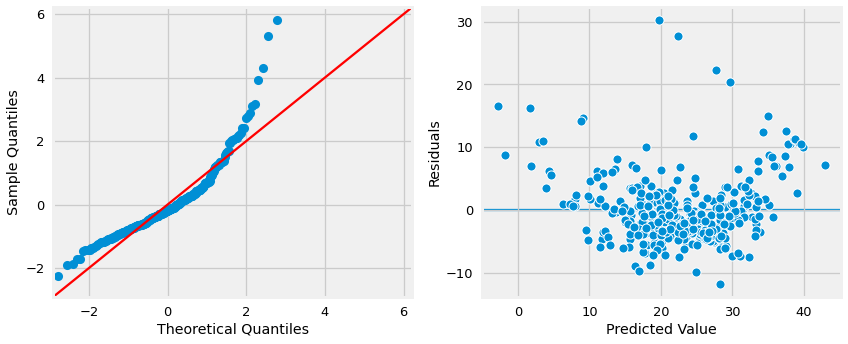

In [29]:
## instantiate an OLS model WITH the training data.
model_raw_cnst = sm.OLS(y_train, X_train_df_cnst)

## Fit the model and view the summary
result_raw_cnst = model_raw_cnst.fit()
sf.evaluate_ols(result_raw_cnst,X_train_df_cnst, y_train)

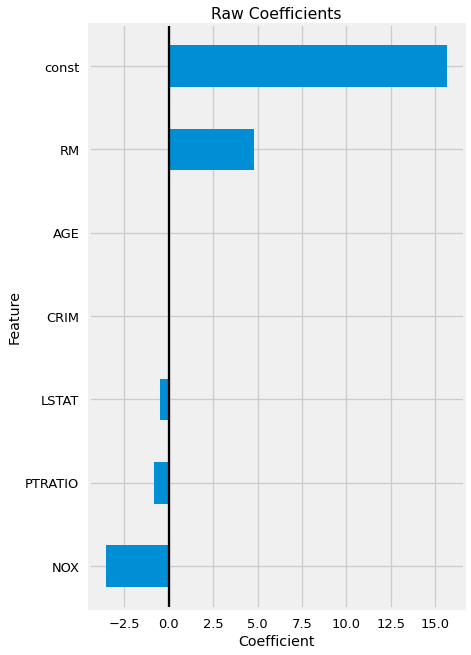

In [30]:
fig_raw =sf.plot_coeffs(result_raw_cnst, ohe_cols, include_const=True,title="Raw Coefficients")

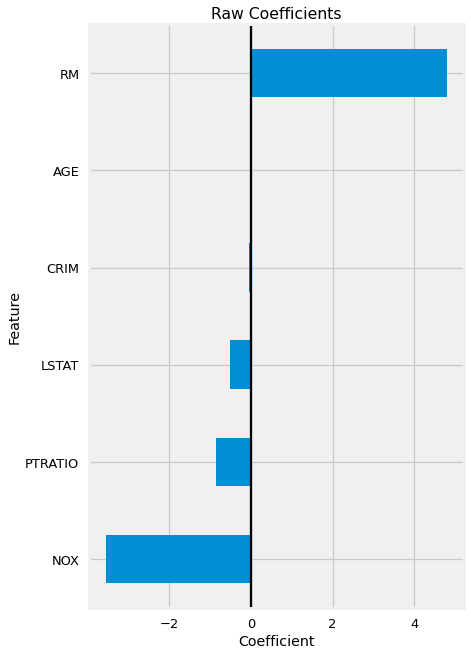

In [31]:
fig_raw =sf.plot_coeffs(result_raw_cnst, ohe_cols, include_const=False,title="Raw Coefficients")

In [32]:
fig_raw_zips =sf.plot_coeffs(result_raw_cnst, nonohe_cols, figsize=(6,12),include_const=False,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Scaled Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.095
Model:                            OLS   Adj. R-squared (uncentered):              0.080
Method:                 Least Squares   F-statistic:                              6.517
Date:                Thu, 23 Jun 2022   Prob (F-statistic):                    1.48e-06
Time:                        14:52:22   Log-Likelihood:                         -1728.2
No. Observations:                 379   AIC:                                      3468.
Df Residuals:                     373   BIC:                                      3492.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.4061      1.417     -0.287      0.775      -3.191       2.379
NOX           -0.4063      1.914     -0.212      0.832      -4.170       3.357
RM             3.2773      1.643      1.995      0.047       0.046       6.508
AGE            0.4612      1.876      0.246      0.806      -3.228       4.150
PTRATIO       -1.8555      1.341     -1.384      0.167      -4.492       0.781
LSTAT         -3.6943      2.062     -1.791      0.074      -7.750       0.361
==============================================================================
Omnibus:                      164.041   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.101
Skew:                           1.827   Prob(JB):                    3.66e-173
Kurtosis:                       9.077   Cond. No.                         3.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

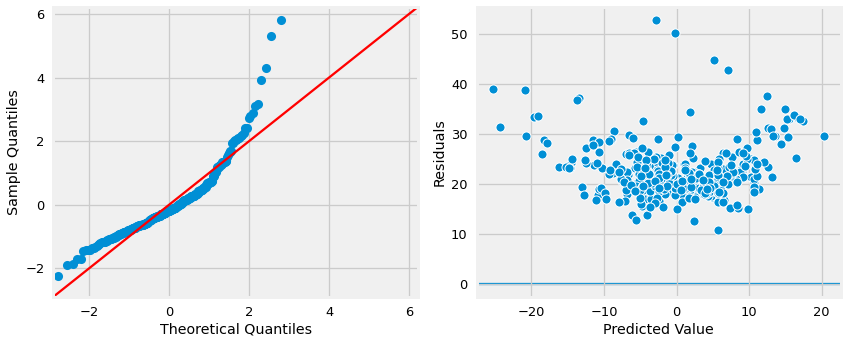

In [33]:
## instantiate an OLS model WITH the training data.
model_scaled = sm.OLS(y_train, X_train_scaled_df)

## Fit the model and view the summary
result_scaled = model_scaled.fit()
sf.evaluate_ols(result_scaled,X_train_scaled_df, y_train)

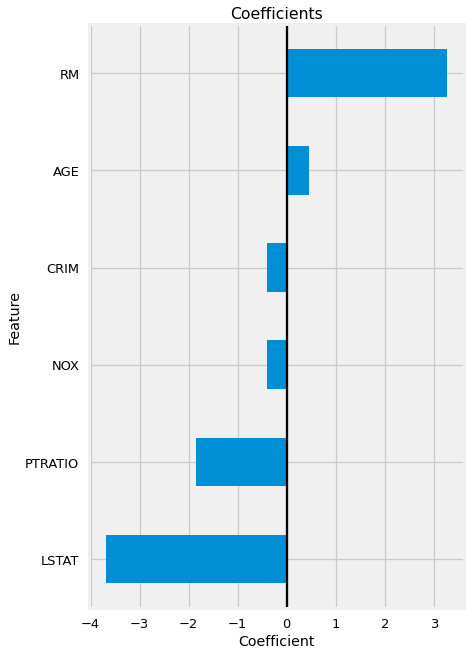

In [34]:
fig_scaled =sf.plot_coeffs(result_scaled,ohe_cols,include_const=True)

In [35]:
fig_scaled_zips =sf.plot_coeffs(result_scaled, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Scaled Numeric - with Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     128.7
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.46e-87
Time:                        14:52:22   Log-Likelihood:                -1162.5
No. Observations:                 379   AIC:                             2339.
Df Residuals:                     372   BIC:                             2366.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.4061      0.319     -1.274      0.204      -1.033       0.221
NOX           -0.4063      0.431     -0.943      0.346      -1.253       0.441
RM             3.2773      0.370      8.862      0.000       2.550       4.005
AGE            0.4612      0.422      1.092      0.275      -0.369       1.292
PTRATIO       -1.8555      0.302     -6.149      0.000      -2.449      -1.262
LSTAT         -3.6943      0.464     -7.959      0.000      -4.607      -2.782
const         22.5332      0.269     83.615      0.000      22.003      23.063
==============================================================================
Omnibus:                      164.041   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.101
Skew:                           1.827   Prob(JB):                    3.66e-173
Kurtosis:                       9.077   Cond. No.                         3.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

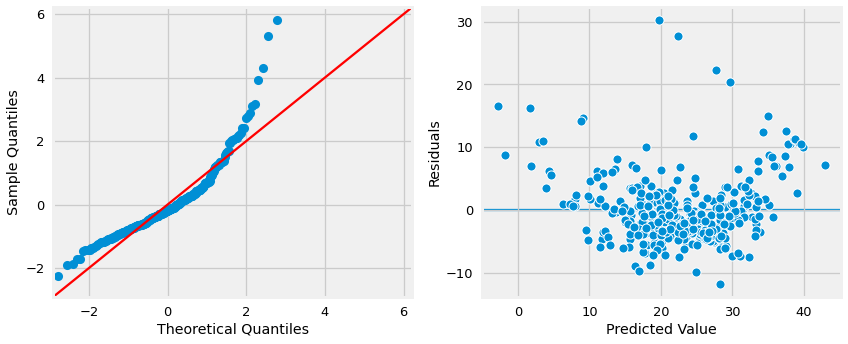

In [36]:
## instantiate an OLS model WITH the training data.
model_scaled_cnst = sm.OLS(y_train, X_train_scaled_df_cnst)

## Fit the model and view the summary
result_scaled_cnst = model_scaled_cnst.fit()
sf.evaluate_ols(result_scaled_cnst,X_train_scaled_df_cnst, y_train)

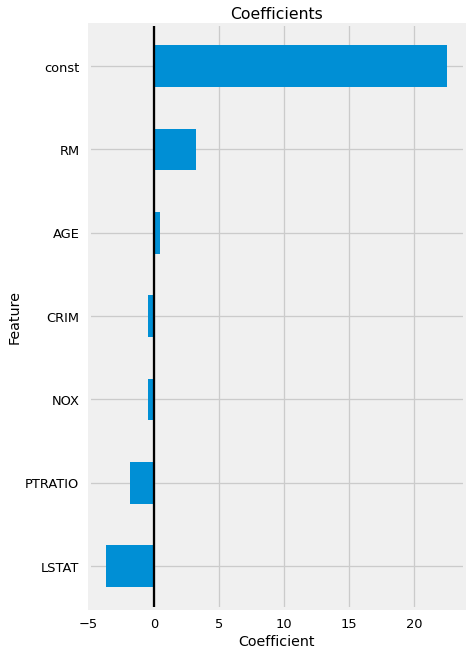

In [37]:
fig_scaled =sf.plot_coeffs(result_scaled_cnst,ohe_cols,include_const=True)

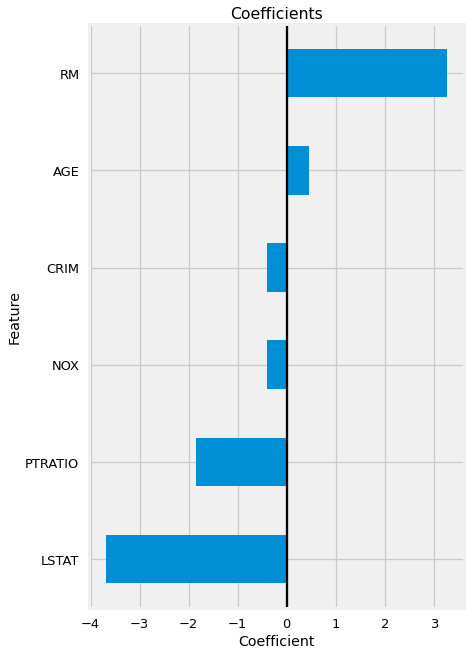

In [38]:
fig_scaled =sf.plot_coeffs(result_scaled_cnst,ohe_cols,include_const=False)

In [39]:
fig_scaled_zips =sf.plot_coeffs(result_scaled_cnst, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


## Modeling - No Outliers

### Raw Numeric - No Constant

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              1545.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):                   6.04e-253
Time:                        14:52:23   Log-Likelihood:                         -1078.8
No. Observations:                 365   AIC:                                      2170.
Df Residuals:                     359   BIC:                                      2193.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0748      0.062     -1.214      0.226      -0.196       0.046
NOX           -0.3862      3.127     -0.124      0.902      -6.535       5.763
RM             6.5249      0.282     23.177      0.000       5.971       7.079
AGE            0.0039      0.013      0.297      0.767      -0.022       0.030
PTRATIO       -0.6770      0.097     -6.981      0.000      -0.868      -0.486
LSTAT         -0.4847      0.060     -8.027      0.000      -0.603      -0.366
==============================================================================
Omnibus:                      199.020   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2110.526
Skew:                           2.060   Prob(JB):                         0.00
Kurtosis:                      14.037   Cond. No.                         981.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

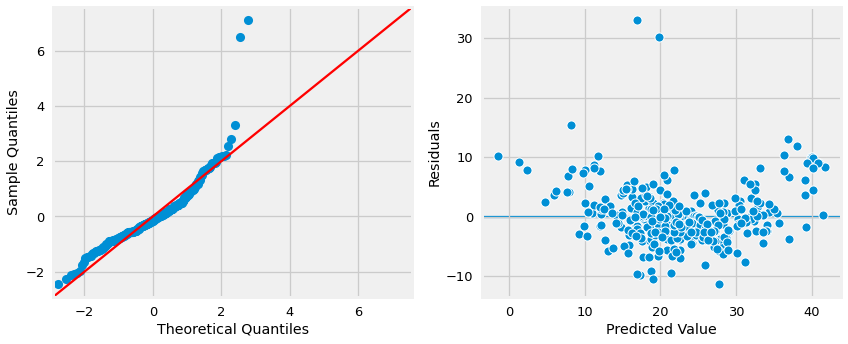

In [40]:
## instantiate an OLS model WITH the training data.
model_cln = sm.OLS(y_train_cln, X_train_df_cln)

## Fit the model and view the summary
result_cln = model_cln.fit()
sf.evaluate_ols(result_cln,X_train_df_cln, y_train_cln)

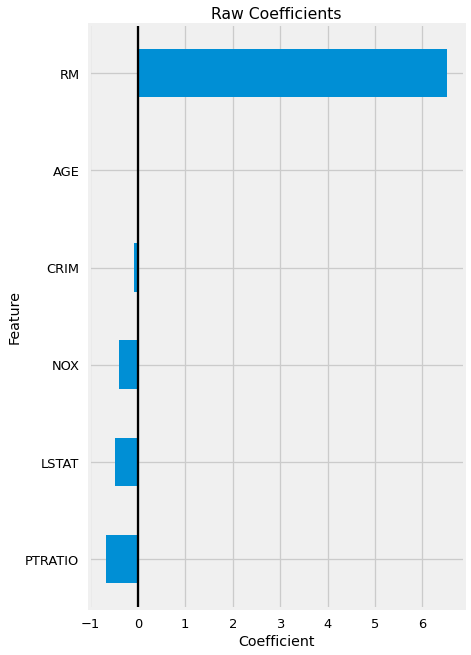

In [41]:
fig_raw =sf.plot_coeffs(result_cln, ohe_cols, include_const=True,title="Raw Coefficients")

In [42]:
fig_raw_zips =sf.plot_coeffs(result_cln, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Raw Numeric - with Constant

In [43]:
X_train_df_cln_cnst.describe()

CRIM         NOX          RM         AGE     PTRATIO       LSTAT  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean     2.610050    0.551262    6.288756   67.883288   18.392055   12.442274   
std      4.944561    0.116354    0.634508   28.273689    2.200978    6.639697   
min      0.006320    0.389000    4.368000    6.000000   12.600000    1.730000   
25%      0.081990    0.448000    5.895000   42.200000   16.900000    7.340000   
50%      0.261690    0.532000    6.209000   76.700000   19.000000   11.280000   
75%      2.379340    0.614000    6.556000   93.300000   20.200000   16.940000   
max     28.655800    0.871000    8.337000  100.000000   22.000000   30.810000   

       const  
count  365.0  
mean     1.0  
std      0.0  
min      1.0  
25%      1.0  
50%      1.0  
75%      1.0  
max      1.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     153.8
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           6.87e-96
Time:                        14:52:23   Log-Likelihood:                -1075.8
No. Observations:                 365   AIC:                             2166.
Df Residuals:                     358   BIC:                             2193.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0162      0.066     -0.246      0.806      -0.146       0.113
NOX           -3.8506      3.420     -1.126      0.261     -10.576       2.875
RM             5.4868      0.512     10.715      0.000       4.480       6.494
AGE            0.0130      0.014      0.954      0.341      -0.014       0.040
PTRATIO       -0.8749      0.126     -6.924      0.000      -1.123      -0.626
LSTAT         -0.5413      0.064     -8.408      0.000      -0.668      -0.415
const         12.0429      4.977      2.420      0.016       2.255      21.831
==============================================================================
Omnibus:                      190.605   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1745.854
Skew:                           2.001   Prob(JB):                         0.00
Kurtosis:                      12.939   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

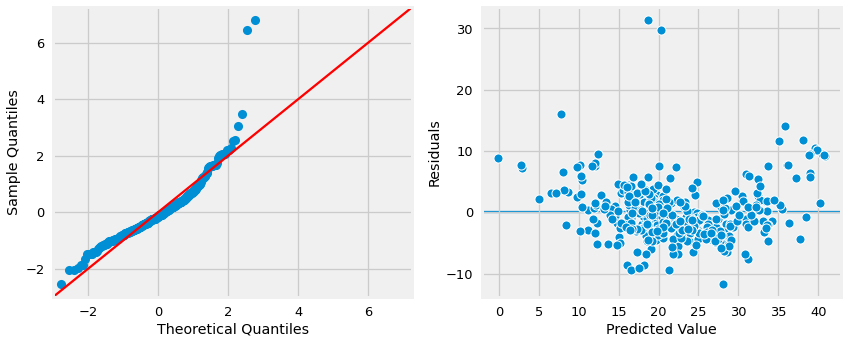

In [44]:
## instantiate an OLS model WITH the training data.
model_cln_cnst = sm.OLS(y_train_cln, X_train_df_cln_cnst)

## Fit the model and view the summary
result_cln_cnst = model_cln_cnst.fit()
sf.evaluate_ols(result_cln_cnst,X_train_df_cln_cnst, y_train_cln)

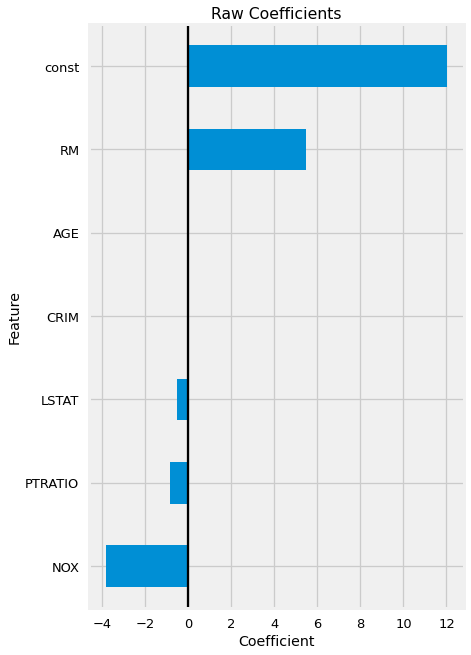

In [45]:
fig_raw =sf.plot_coeffs(result_cln_cnst, ohe_cols, include_const=True,title="Raw Coefficients")

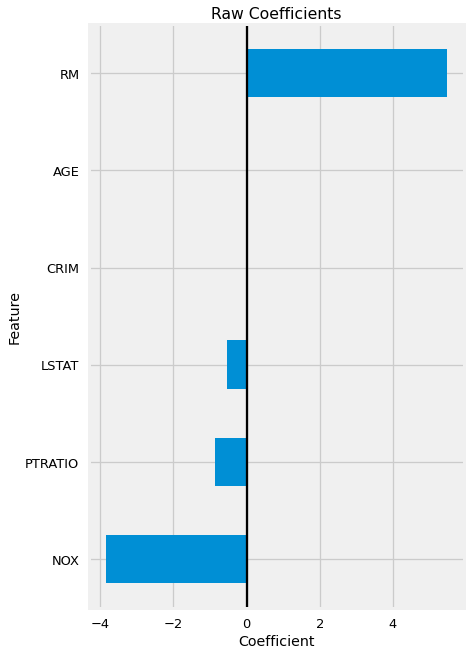

In [46]:
fig_raw =sf.plot_coeffs(result_cln_cnst, ohe_cols, include_const=False,title="Raw Coefficients")

In [47]:
fig_raw_zips =sf.plot_coeffs(result_cln_cnst, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Scaled Numeric - No Constant

In [48]:
X_train_scaled_df_cln.describe()

CRIM           NOX            RM           AGE       PTRATIO  \
count  3.650000e+02  3.650000e+02  3.650000e+02  3.650000e+02  3.650000e+02   
mean  -9.246789e-17  1.946692e-16  6.491003e-16 -7.543433e-17  1.912625e-15   
std    1.001373e+00  1.001373e+00  1.001373e+00  1.001373e+00  1.001373e+00   
min   -5.273075e-01 -1.396470e+00 -3.031313e+00 -2.191728e+00 -2.635194e+00   
25%   -5.119828e-01 -8.887016e-01 -6.214209e-01 -9.096281e-01 -6.788359e-01   
50%   -4.755900e-01 -1.657774e-01 -1.258702e-01  3.122626e-01  2.765951e-01   
75%   -4.672338e-02  5.399343e-01  4.217608e-01  9.001868e-01  8.225556e-01   
max    5.274787e+00  2.751738e+00  3.232512e+00  1.137481e+00  1.641496e+00   

              LSTAT  
count  3.650000e+02  
mean   9.733462e-18  
std    1.001373e+00  
min   -1.615583e+00  
25%   -7.695046e-01  
50%   -1.752895e-01  
75%    6.783291e-01  
max    2.770147e+00

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.095
Model:                            OLS   Adj. R-squared (uncentered):              0.079
Method:                 Least Squares   F-statistic:                              6.249
Date:                Thu, 23 Jun 2022   Prob (F-statistic):                    2.93e-06
Time:                        14:52:23   Log-Likelihood:                         -1660.9
No. Observations:                 365   AIC:                                      3334.
Df Residuals:                     359   BIC:                                      3357.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0801      1.613     -0.050      0.960      -3.253       3.093
NOX           -0.4474      1.971     -0.227      0.821      -4.324       3.429
RM             3.4767      1.610      2.160      0.031       0.311       6.642
AGE            0.3665      1.905      0.192      0.848      -3.380       4.113
PTRATIO       -1.9230      1.378     -1.396      0.164      -4.633       0.787
LSTAT         -3.5892      2.118     -1.695      0.091      -7.754       0.575
==============================================================================
Omnibus:                      190.605   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1745.854
Skew:                           2.001   Prob(JB):                         0.00
Kurtosis:                      12.939   Cond. No.                         4.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

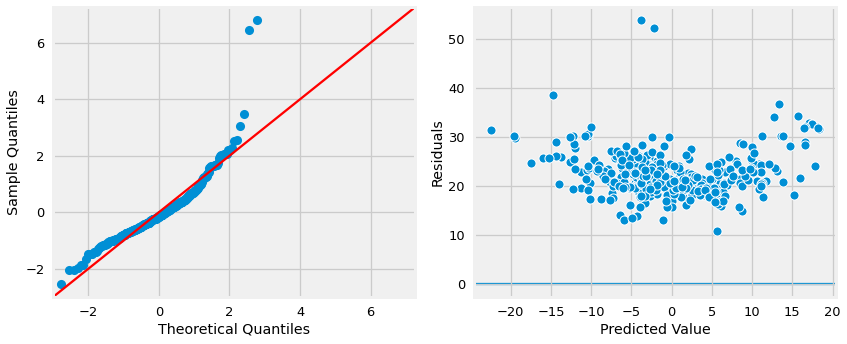

In [49]:
## instantiate an OLS model WITH the training data.
model_cln_scaled = sm.OLS(y_train_cln, X_train_scaled_df_cln)

## Fit the model and view the summary
result_cln_scaled = model_cln_scaled.fit()
sf.evaluate_ols(result_cln_scaled,X_train_scaled_df_cln, y_train_cln)

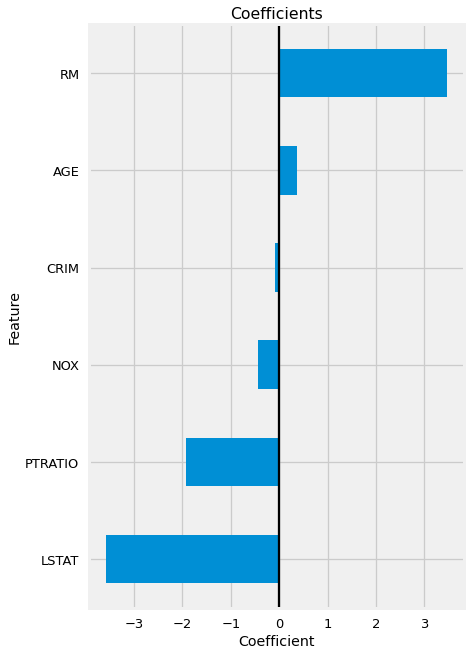

In [50]:
fig_scaled =sf.plot_coeffs(result_cln_scaled,ohe_cols,include_const=True)

In [51]:
fig_scaled_zips =sf.plot_coeffs(result_cln_scaled, nonohe_cols, figsize=(6,12),include_const=True,title="Raw Coefficients")

/Users/codingdojo/Documents/GitHub/_CURRICULUM/curriculum-model-insights/CODE/stack_functions.py:159: UserWarning: 
[!] There were no coefficients to plot.
  warnings.warn("\n[!] There were no coefficients to plot.")


### Scaled Numeric - with Constant

In [52]:
X_train_scaled_df_cln_cnst.describe()

CRIM           NOX            RM           AGE       PTRATIO  \
count  3.650000e+02  3.650000e+02  3.650000e+02  3.650000e+02  3.650000e+02   
mean  -9.246789e-17  1.946692e-16  6.491003e-16 -7.543433e-17  1.912625e-15   
std    1.001373e+00  1.001373e+00  1.001373e+00  1.001373e+00  1.001373e+00   
min   -5.273075e-01 -1.396470e+00 -3.031313e+00 -2.191728e+00 -2.635194e+00   
25%   -5.119828e-01 -8.887016e-01 -6.214209e-01 -9.096281e-01 -6.788359e-01   
50%   -4.755900e-01 -1.657774e-01 -1.258702e-01  3.122626e-01  2.765951e-01   
75%   -4.672338e-02  5.399343e-01  4.217608e-01  9.001868e-01  8.225556e-01   
max    5.274787e+00  2.751738e+00  3.232512e+00  1.137481e+00  1.641496e+00   

              LSTAT  const  
count  3.650000e+02  365.0  
mean   9.733462e-18    1.0  
std    1.001373e+00    0.0  
min   -1.615583e+00    1.0  
25%   -7.695046e-01    1.0  
50%   -1.752895e-01    1.0  
75%    6.783291e-01    1.0  
max    2.770147e+00    1.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     153.8
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           6.87e-96
Time:                        14:52:24   Log-Likelihood:                -1075.8
No. Observations:                 365   AIC:                             2166.
Df Residuals:                     358   BIC:                             2193.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0801      0.325     -0.246      0.806      -0.720       0.560
NOX           -0.4474      0.397     -1.126      0.261      -1.229       0.334
RM             3.4767      0.324     10.715      0.000       2.839       4.115
AGE            0.3665      0.384      0.954      0.341      -0.389       1.122
PTRATIO       -1.9230      0.278     -6.924      0.000      -2.469      -1.377
LSTAT         -3.5892      0.427     -8.408      0.000      -4.429      -2.750
const         22.4384      0.244     92.070      0.000      21.959      22.918
==============================================================================
Omnibus:                      190.605   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1745.854
Skew:                           2.001   Prob(JB):                         0.00
Kurtosis:                      12.939   Cond. No.                         4.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

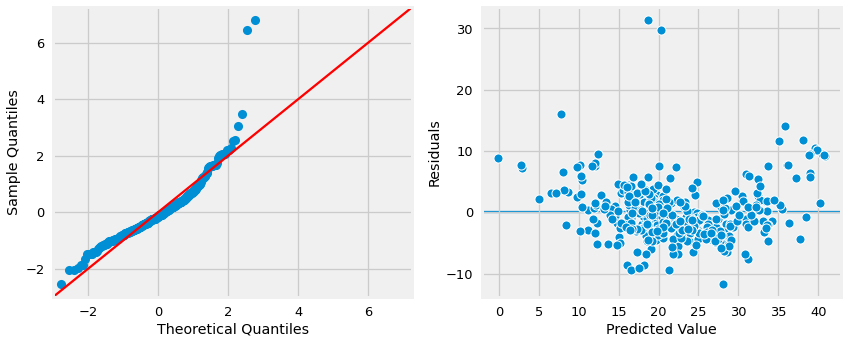

In [53]:
## instantiate an OLS model WITH the training data.
model_cln_scaled_cnst = sm.OLS(y_train_cln, X_train_scaled_df_cln_cnst)

## Fit the model and view the summary
result_cln_scaled_cnst = model_cln_scaled_cnst.fit()
sf.evaluate_ols(result_cln_scaled_cnst,X_train_scaled_df_cln_cnst, y_train_cln)

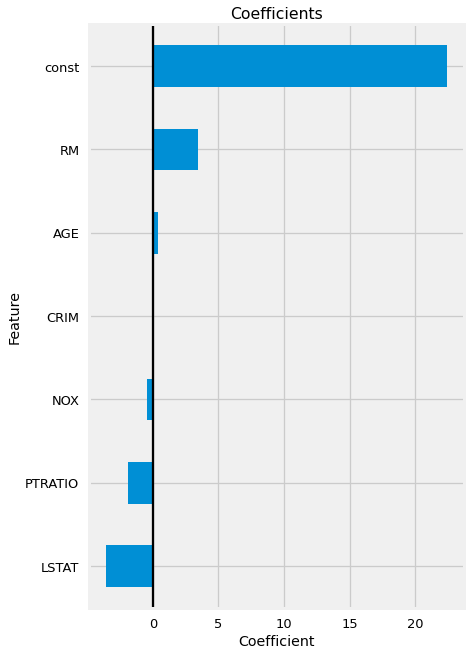

In [54]:
fig_scaled =sf.plot_coeffs(result_cln_scaled_cnst,ohe_cols,include_const=True)

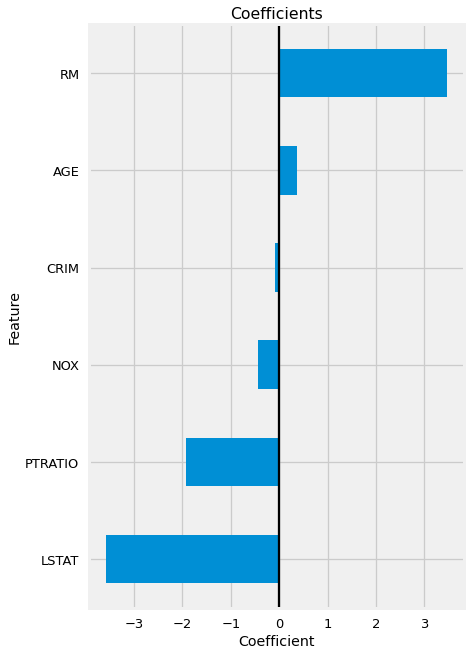

In [55]:
fig_scaled =sf.plot_coeffs(result_cln_scaled_cnst,ohe_cols,include_const=False)

# Adding Explanations

## Sklearn LinearRegression

> Pick 1 of the statsmodels models above to remake in sklearn for model explanations

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
## Making new var name sfor sklearn - update these to change model
ols_results = result_scaled_cnst
# sf.evaluate_ols(ols_results,X_tr,y_tr)
X_tr = X_train_scaled_df_cnst
X_te = X_test_scaled_df_cnst
y_tr = y_train
y_te = y_test

## If const in orig df, 
fit_intercept = 'const' in X_tr.columns

if fit_intercept==True:
    X_tr = X_tr.drop(columns='const')
    X_te = X_te.drop(columns='const')
fit_intercept

True

In [58]:
linreg = LinearRegression(fit_intercept=fit_intercept)
linreg.fit(X_tr, y_tr)
print(f"Train R^2: {format(linreg.score(X_tr,y_tr),'.2f')}")
print(f"Test R^2: {format(linreg.score(X_te,y_te),'.2f')}")
linreg.get_params()

Train R^2: 0.67
Test R^2: 0.71


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [59]:
coeffs = sf.get_coeffs(linreg,X_tr,name='LinReg Coeffs')
coeffs#.head(20)

CRIM       -0.406055
NOX        -0.406298
RM          3.277311
AGE         0.461213
PTRATIO    -1.855460
LSTAT      -3.694305
const      22.533245
Name: LinReg Coeffs, dtype: float64

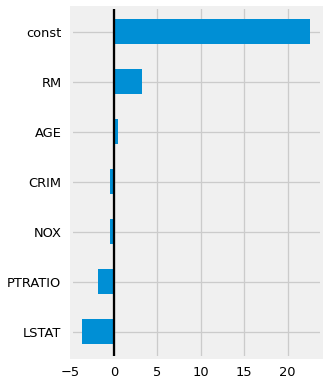

In [60]:
ax = coeffs.drop(ohe_cols).sort_values().plot(kind='barh',figsize=(4,6))
ax.axvline(0,color='black')

In [61]:
if len(ohe_cols)>1:

    ax = coeffs[ohe_cols].sort_values().plot(kind='barh',figsize=(4,6))
    ax.axvline(0,color='black')

In [62]:
## save 1 df of skelarn vs ols coeffs
compare_coeffs = pd.DataFrame({'OLS':ols_results.params,
                              'LinReg':coeffs}).round(2)
compare_coeffs['Agree?'] = compare_coeffs['OLS']==compare_coeffs['LinReg']

display(compare_coeffs.round(3))
compare_coeffs['Agree?'].value_counts(1)
#compare_coeffs.style.format({'OLS':"{:,.2f}","LinReg":"{:,.2f}"})

OLS  LinReg  Agree?
CRIM     -0.41   -0.41    True
NOX      -0.41   -0.41    True
RM        3.28    3.28    True
AGE       0.46    0.46    True
PTRATIO  -1.86   -1.86    True
LSTAT    -3.69   -3.69    True
const    22.53   22.53    True

True    1.0
Name: Agree?, dtype: float64

In [63]:
compare_coeffs[compare_coeffs['Agree?']==True]

OLS  LinReg  Agree?
CRIM     -0.41   -0.41    True
NOX      -0.41   -0.41    True
RM        3.28    3.28    True
AGE       0.46    0.46    True
PTRATIO  -1.86   -1.86    True
LSTAT    -3.69   -3.69    True
const    22.53   22.53    True

In [64]:
# compare_coeffs[compare_coeffs['Agree?']==False]

In [65]:
compare_coeffs.style.bar()

> ISSUE WITH COEFFICIENTS NOT MATCHING - SEE IF TRUE FOR OTHER DATASETS. 

### Shap

In [66]:
import shap
shap.initjs()

shap.__version__

'0.41.0'

In [67]:
## sampling 200 rows from training data
X_shap = shap.sample(X_tr,nsamples=200,random_state=321)

In [68]:
## Creating explainer from model and getting shap values
explainer = shap.LinearExplainer(linreg,X_shap)
shap_values = explainer(X_shap)
shap_values.shape

(200, 6)

In [69]:
# [i for i in dir(shap_values) if not i.startswith("_")]

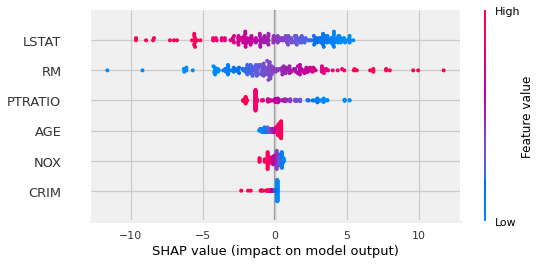

In [70]:
shap.summary_plot(shap_values)

In [71]:
explainer.expected_value

22.187986228976406

In [72]:
shap.force_plot(explainer.expected_value,shap_values= shap_values.values, features=X_shap)       

## RandomForest

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_tr,y_tr)

RandomForestRegressor()

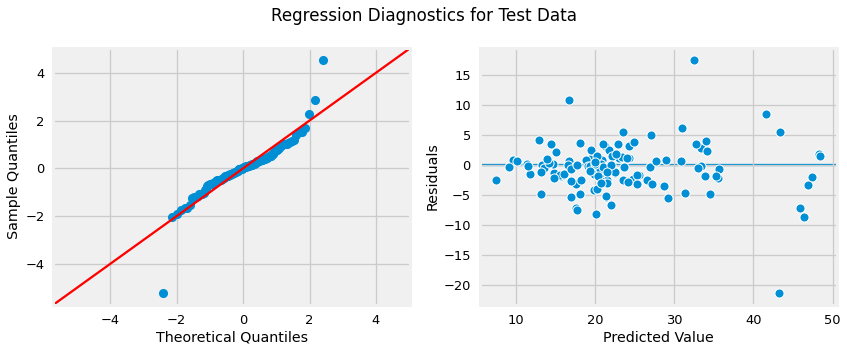

Score
Metric Split       
R^2    Train   0.98
       Test    0.82
RMSE   Train   1.42
       Test    4.03

In [74]:
scores = sf.evaluate_regression(rf_reg,X_te, y_te, X_train_df=X_tr, y_train=y_tr,
                            return_scores=True)

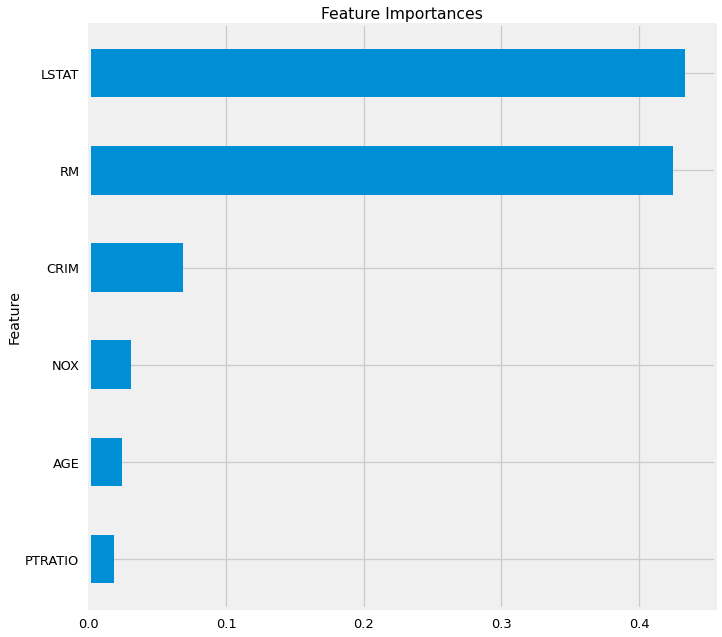

In [75]:
importances = sf.get_importance(rf_reg,X_test_df,top_n=50)

### Permutation Importance

In [76]:
from sklearn.inspection import permutation_importance
## Permutation importance takes a fit mode and test data. 
r = permutation_importance(linreg, X_tr, y_tr,
#                            n_repeats=30
                          )
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [77]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_tr.columns,
                           name = 'permutation importance')
permutation_importances

CRIM       0.003863
NOX        0.004616
RM         0.256400
AGE        0.004117
PTRATIO    0.085331
LSTAT      0.327978
Name: permutation importance, dtype: float64

<AxesSubplot:>

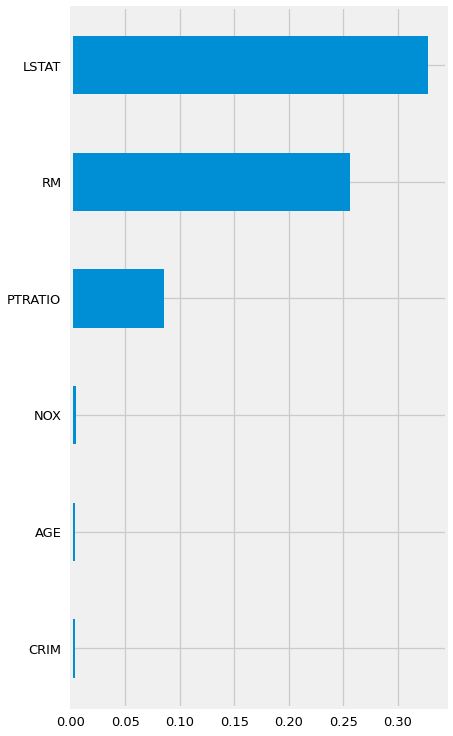

In [78]:
permutation_importances.sort_values().tail(20).plot(kind='barh',figsize=(6,12))

In [79]:
X_shap = shap.sample(X_tr,nsamples=200,random_state=321)

In [80]:
explainer = shap.TreeExplainer(rf_reg,X_shap)
shap_values = explainer(X_shap)

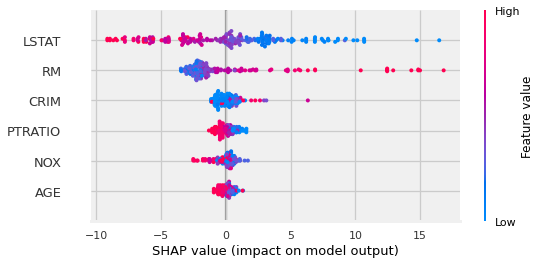

In [81]:
shap.summary_plot(shap_values)

In [82]:
shap.force_plot(explainer.expected_value,shap_values= shap_values.values, features=X_shap)       